# Prediction of Final Density of Titanium Powders Consolidated by Equal Channel Angular Pressing Using Machine Learning Methods

#### •	Finite Element Analysis of ECAP Consolidation of Titanium powders through simulations using STFC DEFORM 2D software for different process parameters are carried out.


#### •	A dataset is generated using various combinations of process parameters and the results obtained from the Finite Element Analysis.

#### •	Various data visualisation techniques will be used to study the influence of input parameteres on the final density of the workpiece.

In [1]:
# Importing the necessary packages 

import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
# importing the dataset
df = pd.read_excel("ECAP Dataset.xlsx")

## Understanding the dataset

In [3]:
df.head(15)

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Material,Initial Density,Back Pressure,Max Load,Final Volume,Final Density,Density Percentage
0,10,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,22381.20,3217.2600,0.783275,78.327521
1,30,150,0.5,0.05,200,TI-10V-2Fe-3Al,0.8,200,109092.60,3698.1003,1.090290,109.028952
2,40,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,24382.80,3181.5900,0.792057,79.205680
3,0,300,1.0,0.01,20,TI-10V-2Fe-3Al,0.5,200,31172.40,2819.6700,0.893722,89.372161
4,0,300,1.0,0.10,20,TI-10V-2Fe-3Al,0.5,200,90846.00,2304.6300,1.093451,109.345101
5,60,100,2.0,0.05,200,TI-13C11Cr3Al,0.8,200,85752.84,3731.0646,1.080657,108.065671
6,0,300,2.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,89893.20,2322.0300,1.085257,108.525730
7,20,300,1.0,0.07,20,TI-10V-2Fe-3Al,0.5,200,44000.40,2775.3000,0.908010,90.800994
8,80,250,1.0,0.05,50,TI-13C11Cr3Al,0.5,200,23928.00,3188.5500,0.790328,79.032789
9,0,200,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,101228.40,2335.9500,1.078790,107.879021


#### The dataset consists of 12 features, in which 8 are input parameters (Corner Angle, Temperature, Speed, Friction Factor, Temp of die, Material, Initial Density, Back Pressure) and the remaining 4 are output parameters ( Max Load, Final Volume, Final Density, Density Percentage) The major parameter that has to be analysed here is the Final Density. 

In [3]:
df.shape

(154, 12)

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density Percentage', ylabel='Density'>

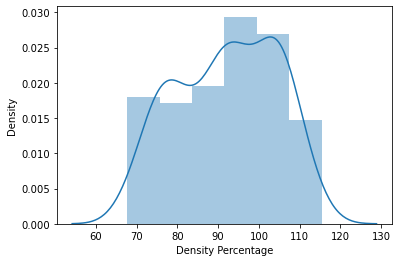

In [4]:
sns.distplot(df['Density Percentage'])

#### the distribution of the target variable (density percentage) is shown and the majority lies between 90 and 100 percet density. 

## Converting Final density as a catogorical data

In [5]:
df['Final Density'] = df['Final Density'].astype(int)
df.head(15)

,Corner Angle,Temperature,Speed,Friction Factor,Temp of die,Material,Initial Density,Back Pressure,Max Load,Final Volume,Final Density,Density Percentage
0,10,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,22381.20,3217.2600,0,78.327521
1,30,150,0.5,0.05,200,TI-10V-2Fe-3Al,0.8,200,109092.60,3698.1003,1,109.028952
2,40,300,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,24382.80,3181.5900,0,79.205680
3,0,300,1.0,0.01,20,TI-10V-2Fe-3Al,0.5,200,31172.40,2819.6700,0,89.372161
4,0,300,1.0,0.10,20,TI-10V-2Fe-3Al,0.5,200,90846.00,2304.6300,1,109.345101
5,60,100,2.0,0.05,200,TI-13C11Cr3Al,0.8,200,85752.84,3731.0646,1,108.065671
6,0,300,2.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,89893.20,2322.0300,1,108.525730
7,20,300,1.0,0.07,20,TI-10V-2Fe-3Al,0.5,200,44000.40,2775.3000,0,90.800994
8,80,250,1.0,0.05,50,TI-13C11Cr3Al,0.5,200,23928.00,3188.5500,0,79.032789
9,0,200,1.0,0.05,20,TI-10V-2Fe-3Al,0.5,200,101228.40,2335.9500,1,107.879021


#### The Final density column is actully a float data type but it is converted to int. by doing this we have converted the column as a catogorical feature. 0 - Porous & 1 - fully dense

## Data visualisation

<AxesSubplot:xlabel='Final Density', ylabel='count'>

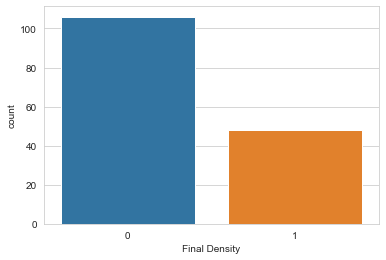

In [21]:
sns.countplot(x="Final Density",data=df)

#### There are 48 values of fully dense material and 106  of porous material. 

In [22]:
pd.pivot_table(df,index=["Final Density"])

,Back Pressure,Corner Angle,Density Percentage,Final Volume,Friction Factor,Initial Density,Max Load,Speed,Temp of die,Temperature
Final Density,,,,,,,,,,
0,75.471698,47.54717,85.668283,3392.509768,0.042453,0.576415,41634.709623,1.100943,116.132075,312.264151
1,141.666667,21.25000,106.216518,3412.385292,0.045000,0.718750,88973.972167,1.168750,216.875000,250.833333


#### The influence of input parameters can be see clearly with the average values for final density type.

In [23]:
pd.pivot_table(df,index=["Material","Final Density"])

Back Pressure  Corner Angle  Density Percentage  \
Material       Final Density                                                    
TI-10V-2Fe-3Al 0                  74.626866     44.477612           86.022372   
               1                 144.230769      7.307692          106.227794   
TI-13C11Cr3Al  0                  76.923077     52.820513           85.059975   
               1                 138.636364     37.727273          106.203192   

                              Final Volume  Friction Factor  Initial Density  \
Material       Final Density                                                   
TI-10V-2Fe-3Al 0               3414.232001         0.041642         0.582090   
               1               3158.043669         0.046538         0.665385   
TI-13C11Cr3Al  0               3355.192085         0.043846         0.566667   
               1               3712.970845         0.043182         0.781818   

                                  Max Load    Speed   Temp of die  Temperature  
Material       Final Density                                                    
TI-10V-2Fe-3Al 0              39723.076522  1.062687    97.611940   339.850746  
               1              83979.316615  1.130769   169.615385   316.923077  
TI-13C11Cr3Al  0              44918.797256  1.166667   147.948718   264.871795  
               1              94876.746909  1.213636   272.727273   172.727273

#### The influence of material on final density type can be analysed.

<AxesSubplot:xlabel='Material', ylabel='count'>

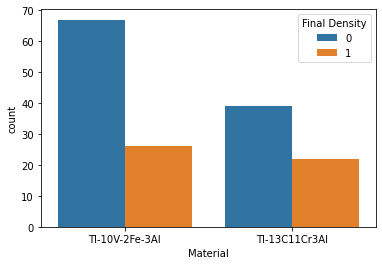

In [11]:
sns.countplot(x="Material",hue="Final Density",data=df)

#### we can see TI-13C11Cr3Al has better percentage of fully dense material than TI-10V-2Fe-3Al 

<AxesSubplot:xlabel='Final Density', ylabel='count'>

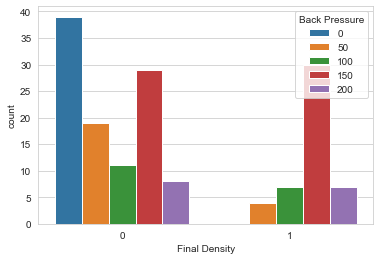

In [26]:
sns.countplot(x="Final Density",hue="Back Pressure",data=df)

<AxesSubplot:xlabel='Material', ylabel='Max Load'>

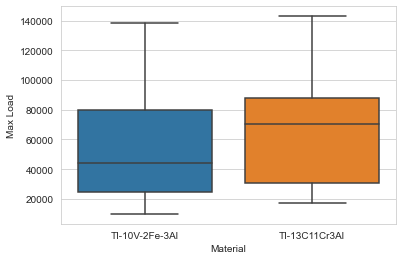

In [27]:
sns.boxplot(x='Material',y='Max Load', data=df)

#### TI-13C11Cr3Al requires more load on an average

<AxesSubplot:xlabel='Material', ylabel='Density Percentage'>

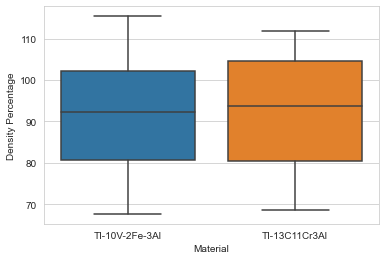

In [28]:
sns.boxplot(x='Material',y='Density Percentage', data=df)

#### The average density percentage of both the materials are almost same.

<AxesSubplot:xlabel='Corner Angle', ylabel='Density Percentage'>

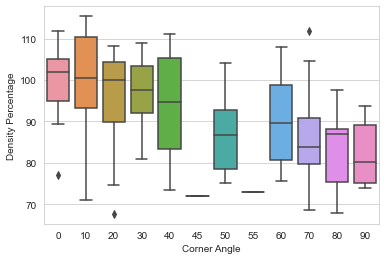

In [29]:
sns.boxplot(x='Corner Angle',y='Density Percentage', data=df)

#### The effect of corner angle.

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Corner Angle', ylabel='Density Percentage'>

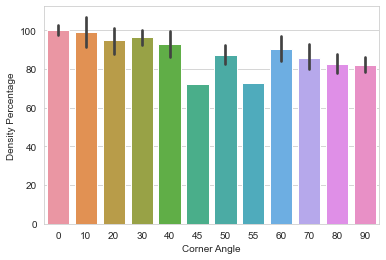

In [30]:
sns.barplot(df['Corner Angle'], df['Density Percentage'])

#### The effect of corner angle.

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


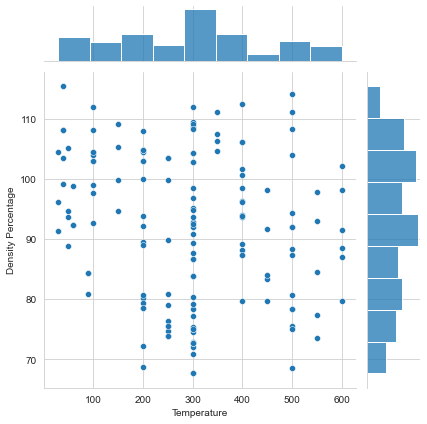

In [31]:
sns.jointplot(df['Temperature'], df['Density Percentage'])

#### The effect of Friction factor.

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


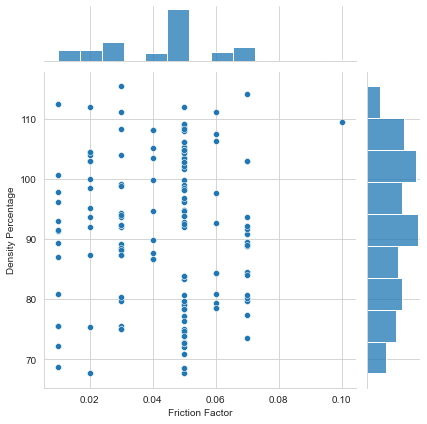

In [32]:
sns.jointplot(df['Friction Factor'], df['Density Percentage'])

#### The effect of Friction factor.

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


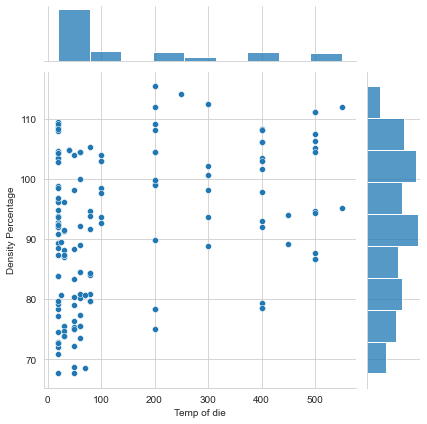

In [33]:
sns.jointplot(df['Temp of die'], df['Density Percentage'])

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Initial Density', ylabel='Density Percentage'>

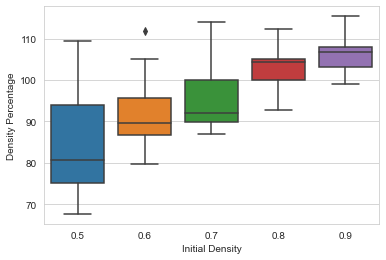

In [36]:
sns.boxplot(df['Initial Density'], df['Density Percentage'])

<AxesSubplot:xlabel='Back Pressure', ylabel='Density Percentage'>

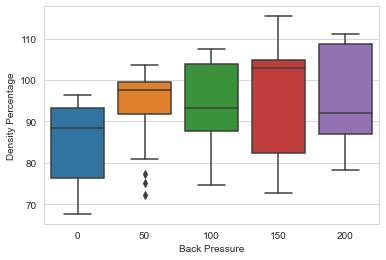

In [37]:
sns.boxplot(x='Back Pressure',y='Density Percentage', data=df)

<AxesSubplot:xlabel='Back Pressure', ylabel='Density Percentage'>

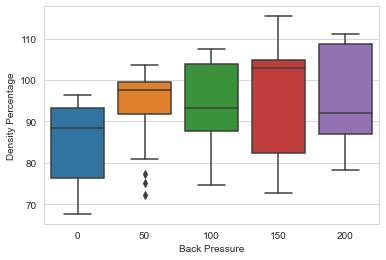

In [38]:
sns.boxplot(x='Back Pressure',y='Density Percentage', data=df)

In [40]:
#Corner Angle

D:\PROGRAM FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


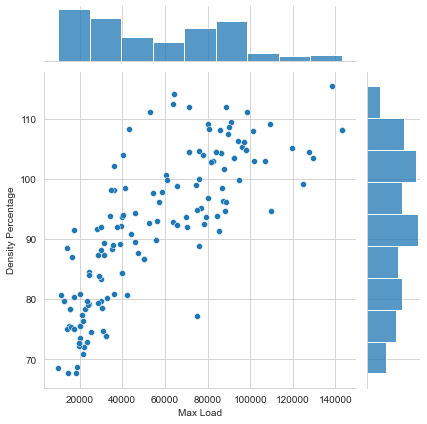

In [41]:
sns.jointplot(df['Max Load'], df['Density Percentage'])

<AxesSubplot:xlabel='Corner Angle', ylabel='Max Load'>

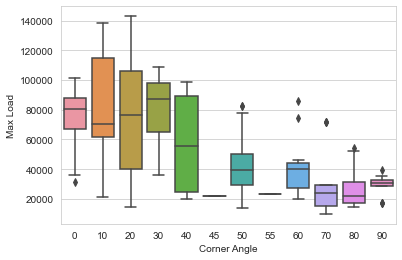

In [42]:
sns.boxplot(x='Corner Angle',y='Max Load', data=df)